# Model ML

### Decision Tree

***Step 1. Reading the processed dataset***

In [17]:
import pandas as pd

train_data = pd.read_csv("/workspaces/JLL_Decision_Trees_ML/data/processed/clean_diabetes_train.csv")
test_data = pd.read_csv("/workspaces/JLL_Decision_Trees_ML/data/processed/clean_diabetes_test.csv")

In [18]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

***Step 2: Model initialization and training***

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

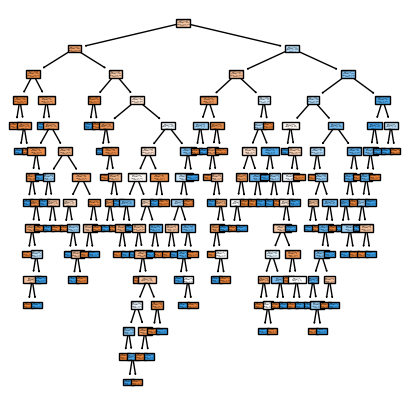

In [20]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(5,5))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

***Step 3: Model prediction***

In [21]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7597402597402597

***Step 4: Saving the model***

In [23]:
from pickle import dump

dump(model, open("/workspaces/JLL_Decision_Trees_ML/models/decision_tree_classifier_default_42.sav", "wb"))

***Optimize the previous model***

In [31]:
from sklearn.model_selection import GridSearchCV
import numpy as np

hyperparams = {
    "max_depth": np.arange(1,50,2),
    "min_samples_split": np.linspace(0.01, 1, 10),
    "min_samples_leaf" : np.linspace(0.01, 1, 10),
    "max_features" : ["sqrt", "log2"],
    "criterion": ["gini", "entropy", "log_loss"],
    "random_state" : [42]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'min_samples_split': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'random_state': [42]},
             scoring='accuracy')

In [32]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'random_state': 42}


***Saving and prediction the Grid Model***

In [33]:
grid_model = grid.best_estimator_

dump(grid_model, open("/workspaces/JLL_Decision_Trees_ML/models/decision_tree_classifier_grid.sav", "wb"))


In [34]:
y_pred_grid = grid_model.predict(X_test)
y_pred_grid

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_grid)

0.7467532467532467